## COHORT ANALYSIS && RFM ANALYSIS && Customer Segmentation 

## IMPORTING LIBARARIES 

In [33]:
# data manuplation

import pandas as pd 
import numpy as np 

#data viz

import matplotlib.pyplot as plt
import seaborn as sns 

#date manuplation

from datetime import datetime,timedelta

# data pre-processing 

from sklearn.preprocessing import StandardScaler

# hierarchial clustring 

from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# k-mean clustring 
from sklearn.cluster import KMeans


# evaultion 
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score



sns.set() 

## IMPORTING DATA 

In [2]:
# read excel file into dataframe
data=pd.read_excel('Online Retail.xlsx')

### MISSING VALUES 

In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# FUNCTION TO NOW THE PERCENTAGE OF THE NULL VALUES 
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

InvoiceNo - 0%
StockCode - 0%
Description - 0%
Quantity - 0%
InvoiceDate - 0%
UnitPrice - 0%
CustomerID - 25%
Country - 0%


In [6]:
# REMOVING NULL VALUES 
data.dropna(subset='CustomerID',inplace=True)


### duplicates

In [7]:
# duplicates values |
data.duplicated().sum()

5225

In [8]:
data = data.drop_duplicates()

### DATA  Type 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [10]:
data['CustomerID']=data['CustomerID'].astype('int')

In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int32
Country                object
dtype: object

### DATA EXPLORATION 


In [12]:
# add total-amount column : 
data['TotalAmount']=data['UnitPrice']*data['Quantity']

In [13]:
# statistical analysis  for quntative variable 
data.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount
count,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,20.613638
std,250.283037,69.764035,1714.006089,430.352218
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13939.000000,4.250000
50%,5.000000,1.950000,15145.000000,11.700000
75%,12.000000,3.750000,16784.000000,19.800000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [14]:
# statistical analysis for categorical variable 
data.describe(include=['O'])

,InvoiceNo,StockCode,Description,Country
count,401604,401604,401604,401604
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2065,2058,356728


### FILTERING 

In [15]:
# numerical filtering

data=data[(data['Quantity']>0) & (data['TotalAmount']>0)]



In [16]:
data['InvoiceNo'].astype('str')

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 392692, dtype: object

In [17]:
# categorical filtering 
data=data[~data['InvoiceNo'].astype(str).str.contains('c')]

In [18]:
data.shape

(392692, 9)

In [19]:
sns.set()

In [20]:
# copy data to new datafram for RFM & CLUSTRING 
RFM=data.copy()

## EDA 

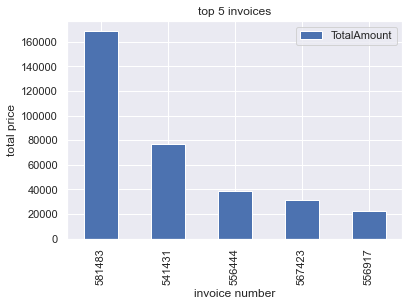

<Figure size 720x1440 with 0 Axes>

In [21]:
top_5= data.groupby("InvoiceNo").agg({"TotalAmount":"sum"}).sort_values(by ="TotalAmount",ascending=False).head()
top_5.plot(kind='bar');
plt.title('top 5 invoices')
plt.xlabel('invoice number')
plt.ylabel('total price')
plt.figure(figsize=(10,20))
plt.show();

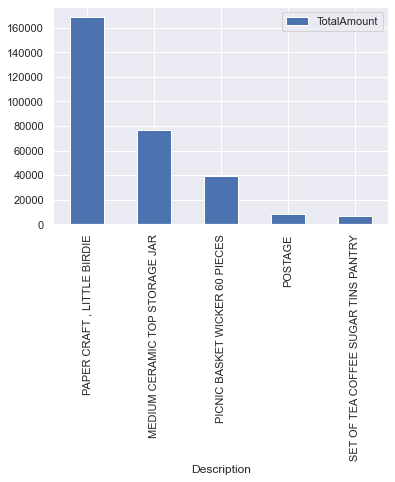

In [22]:
top_5_p=data.groupby("Description").agg({"TotalAmount":"max"}).sort_values("TotalAmount", ascending = False).head()
top_5_p.plot(kind='bar');

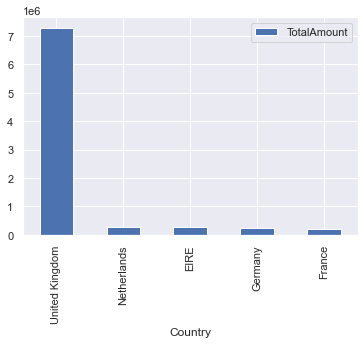

In [23]:
top_5_c=data.groupby("Country").agg({"TotalAmount":"sum"}).sort_values("TotalAmount", ascending = False).head()
top_5_c.plot(kind='bar');

## COHORT ANALYSIS 

In [31]:
# function to get the month from invoice date column
def get_month(x):
    return datetime(x.year,x.month,1)
    

In [34]:
# add a new column to the dataframe " extract the data from timestamp"
data['payment_month']=data['InvoiceDate'].apply(get_month)


In [35]:
# check for the new column
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,payment_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [36]:
# get the first date that a customer entered the database 
data['cohort_month']=data.groupby('CustomerID')['payment_month'].transform('min')

In [37]:
#function to get the diffrence in the two columns :: 
def get_diff(df,col):
    day=df[col].dt.day
    month=df[col].dt.month
    year=df[col].dt.year
    return day,month,year

In [38]:
# cohort month -- 
_,cohort_month,cohort_year=get_diff(data,'cohort_month')
# purchase month -- 
_,payment_month,payment_year=get_diff(data,'payment_month')
month_diff=payment_month-cohort_month
year_diff=payment_year-cohort_year
# get the diffrence -- 
data['cohort_index']= year_diff *12 +month_diff +1

In [39]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,payment_month,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [40]:
# CREATE PIVOT TABLE THAT CONTAINS THE UNQIUE CUSTOMER ID AND THE PAYMENT MONTH 
data.groupby('payment_month')['CustomerID'].nunique()

payment_month
2010-12-01     885
2011-01-01     741
2011-02-01     758
2011-03-01     974
2011-04-01     856
2011-05-01    1056
2011-06-01     991
2011-07-01     949
2011-08-01     935
2011-09-01    1266
2011-10-01    1364
2011-11-01    1664
2011-12-01     615
Name: CustomerID, dtype: int64

In [41]:
# GROUP BY COHORT MONTH AND INDEX BY THE UNIQUE CUSTOMER ID 
pivot_data=data.groupby(['cohort_month','cohort_index'])['CustomerID'].nunique().reset_index()


In [42]:
#MAKE INDEX = cohort_month 
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='CustomerID')
cohort

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_month,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# iloc used to divide the cohort value by itself along side the cohort index 
pivot=cohort.divide(cohort.iloc[:,0],axis=0)

In [44]:
pivot.index=pivot.index.strftime('%B' '%Y')
pivot=pivot.divide(pivot.iloc[:,0],axis=0)

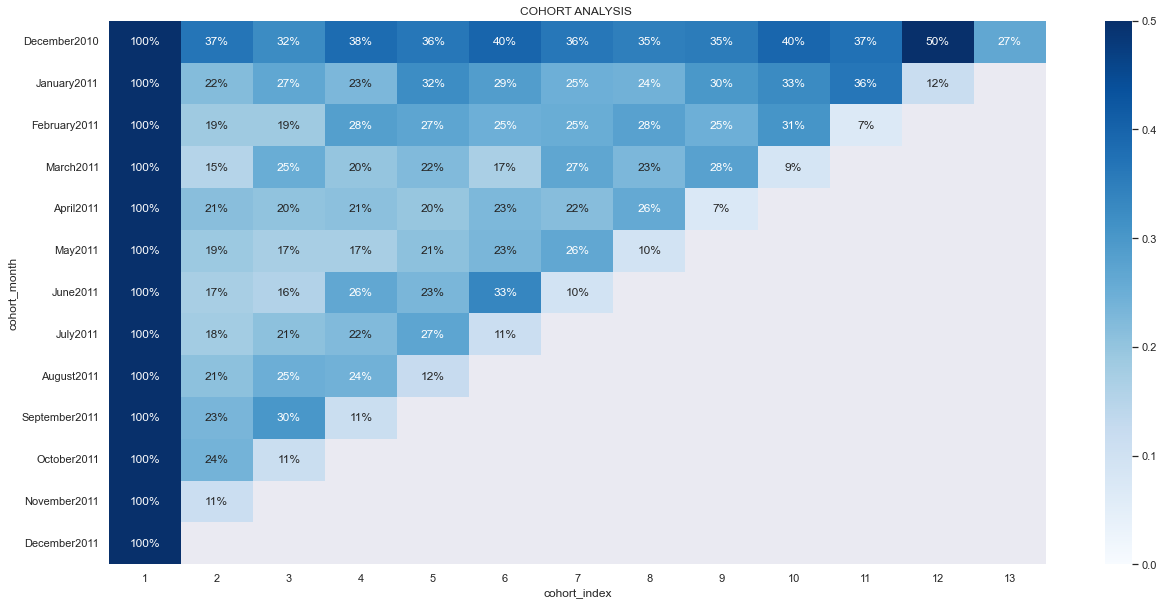

In [45]:

plt.figure(figsize=(21,10))
plt.title('COHORT ANALYSIS ')
sns.heatmap(pivot,annot=True,fmt = '.0%',vmin= 0.0,
           vmax=0.5,cmap='Blues')
plt.show()


# average price 

In [46]:
pivot_data=data.groupby(['cohort_month','cohort_index'])['Quantity'].mean().reset_index()
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='Quantity')

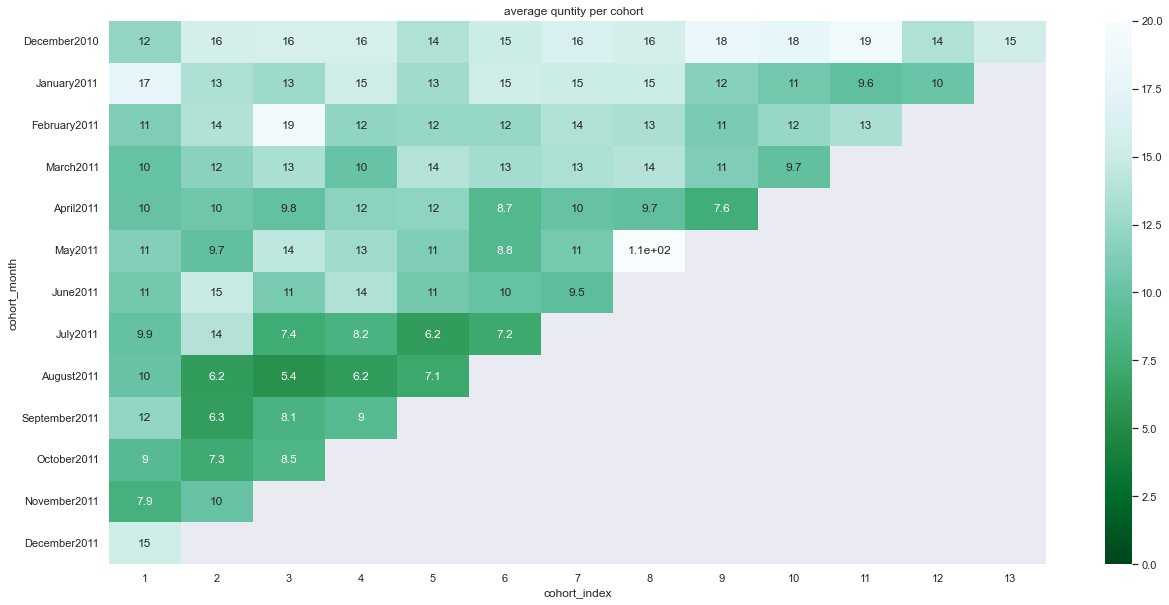

In [47]:

cohort.index=cohort.index.strftime('%B' '%Y')
plt.figure(figsize=(21,10))
plt.title('average quntity per cohort  ')
sns.heatmap(cohort,annot=True,vmin = 0.0,vmax =20,cmap='BuGn_r')
plt.show()

## AVG QUNANTITY 

In [48]:

pivot_data=data.groupby(['cohort_month','cohort_index'])['TotalAmount'].mean().reset_index()
cohort=pivot_data.pivot(index='cohort_month',columns='cohort_index',values='TotalAmount')

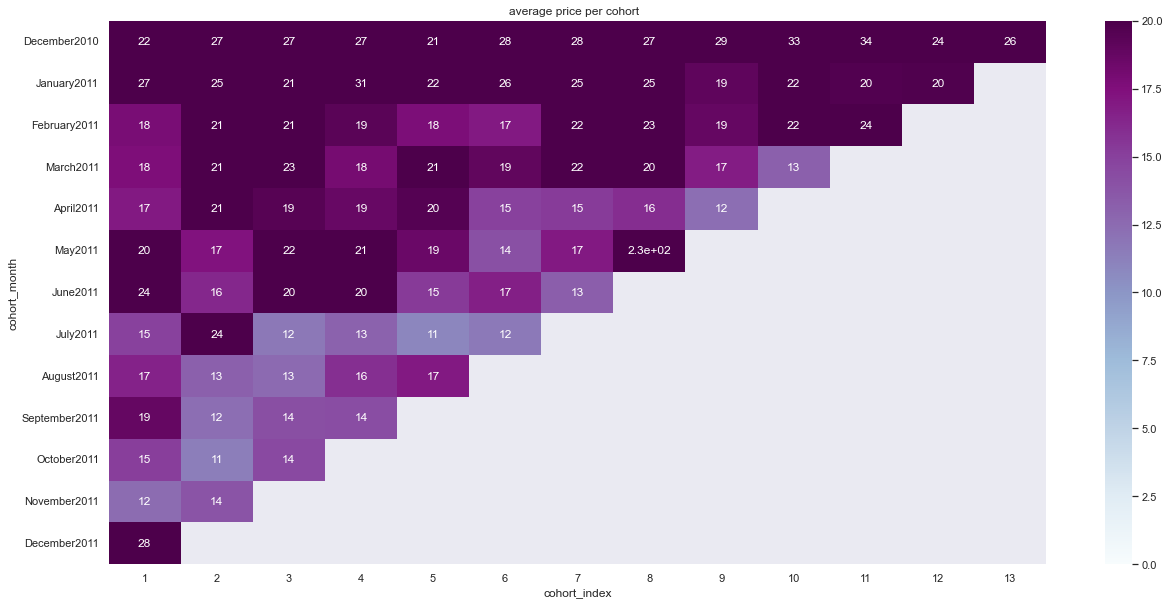

In [49]:
cohort.index=cohort.index.strftime('%B' '%Y')
plt.figure(figsize=(21,10))
plt.title('average price per cohort  ')
sns.heatmap(cohort,annot=True,vmin = 0.0,vmax =20,cmap='BuPu')
plt.show()

## RFM ANALYSIS 

In [50]:
# read data into dataframe 
RFM.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:

max_date=RFM['InvoiceDate'].max()
today=max_date+timedelta(days = 1)

In [52]:
RFM = RFM.groupby('CustomerID').agg({
            'InvoiceDate':lambda x:(today-x.max()).days,
           'InvoiceNo':'count',
            'TotalAmount':'sum'})

In [53]:
RFM.head()

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


In [54]:
RFM.rename(columns={'InvoiceDate':'Recency',
                   'InvoiceNo':'Freq',
                   'TotalAmount':'Montearyvalue'},inplace=True)


In [55]:
RFM.head()

,Recency,Freq,Montearyvalue
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40


## RFM SEGMENTS

In [56]:
# -1 to indiacte that less is better ----RECENCY
r_labels=range(4,0,-1)
r_q=pd.qcut(RFM['Recency'],q=4,labels=r_labels)
    # pd.qcut will devide the data into 4 q with the same size 
RFM=RFM.assign(R=r_q.values)

In [57]:
f_label=range(1,5)

f_q=pd.qcut(RFM['Freq'],q=4,labels=f_label)

RFM=RFM.assign(F=f_q.values)

In [58]:
m_label=range(1,5)
m_q= pd.qcut(RFM['Montearyvalue'],q=4,labels=m_label)
RFM=RFM.assign(M=f_q.values)

In [59]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,1,1,1
12347,2,182,4310.00,4,4,4
12348,75,31,1797.24,2,2,2
12349,19,73,1757.55,3,3,3
12350,310,17,334.40,1,1,1


In [60]:
# now its time for concation 
RFM['score']=RFM[['R','F','M']].sum(axis=1)

In [61]:
# segment 
def join(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
RFM['segment']=RFM.apply(join,axis=1)

In [62]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0
12347,2,182,4310.00,4,4,4,12,4.04.04.0
12348,75,31,1797.24,2,2,2,6,2.02.02.0
12349,19,73,1757.55,3,3,3,9,3.03.03.0
12350,310,17,334.40,1,1,1,3,1.01.01.0


In [63]:
# DIVIDE CUSTOMERS based on SCORE 
def segment(df):
    if df['score']>=9 :
        return 'gold'
    elif (df['score']>=5) and (df['score']<9):
        return 'silver'
    else:
        return "bronze"

In [64]:
RFM['tier']=RFM.apply(segment,axis=1)

In [65]:
RFM.head()

,Recency,Freq,Montearyvalue,R,F,M,score,segment,tier
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,1,3,1.01.01.0,bronze
12347,2,182,4310.00,4,4,4,12,4.04.04.0,gold
12348,75,31,1797.24,2,2,2,6,2.02.02.0,silver
12349,19,73,1757.55,3,3,3,9,3.03.03.0,gold
12350,310,17,334.40,1,1,1,3,1.01.01.0,bronze


In [66]:
x=RFM.groupby('tier').agg({'Recency':'mean','Freq':'mean',
                                    'Montearyvalue':['mean','count']}).round(1)

<AxesSubplot:xlabel='tier'>

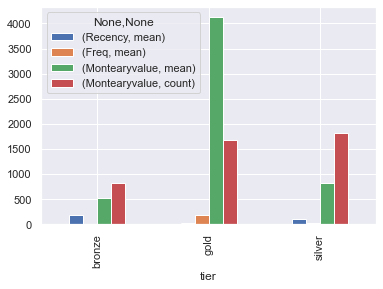

In [67]:

x.plot(kind='bar')

GOLD TIER HAVE HIGHER MONTARERY VALUES- 
SILVER TIER HAVE- HIGHER NUMBERS OF PURCHASING BUT LESS IN RECENCY 
BRONZE HAVE ALMOST FREQ 

<AxesSubplot:xlabel='score'>

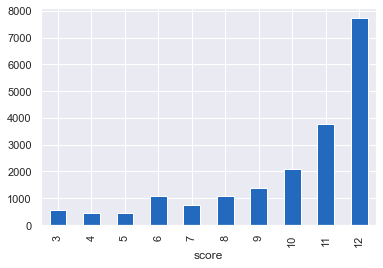

In [68]:
RFM.groupby('score').agg('Montearyvalue').mean().plot(kind='bar', colormap='vlag')

<AxesSubplot:xlabel='score'>

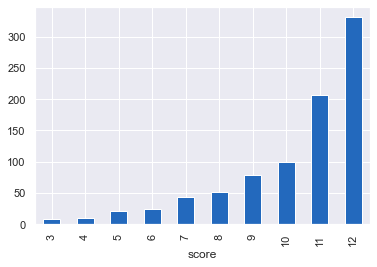

In [69]:
RFM.groupby('score').agg('Freq').mean().plot(kind='bar', colormap='vlag')

<AxesSubplot:xlabel='score'>

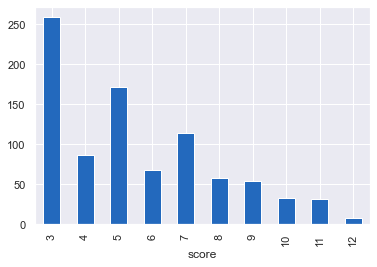

In [70]:
RFM.groupby('score').agg('Recency').mean().plot(kind='bar', colormap='vlag')
# less the better in recency 

#### based on the above 3 graphs the R,F,M is consistant 

## data pre-pocessing for customer segmentation.. 

## checking for outlier

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 0, 'Attributes')

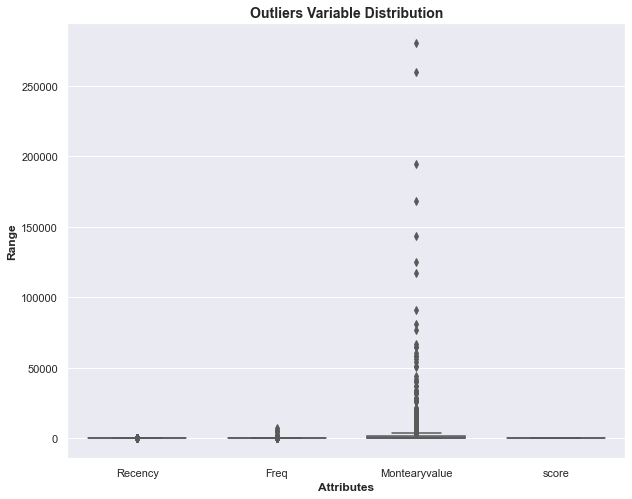

In [71]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM, orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [72]:
RFM=RFM[['Recency','Freq','Montearyvalue']]

In [73]:
def plot(df,col):
    sns.distplot(df[col]);

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


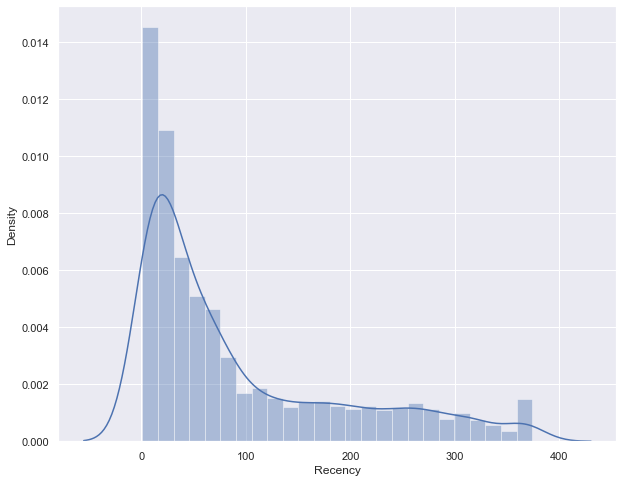

In [74]:
plot(RFM,'Recency');

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


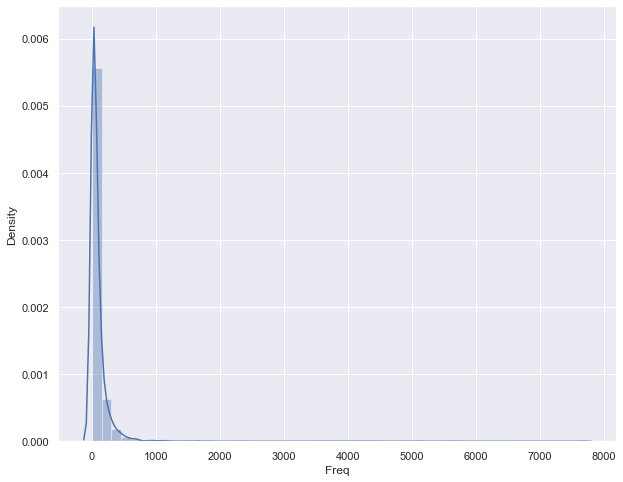

In [75]:
plot(RFM,'Freq')

C:\Users\ahame\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


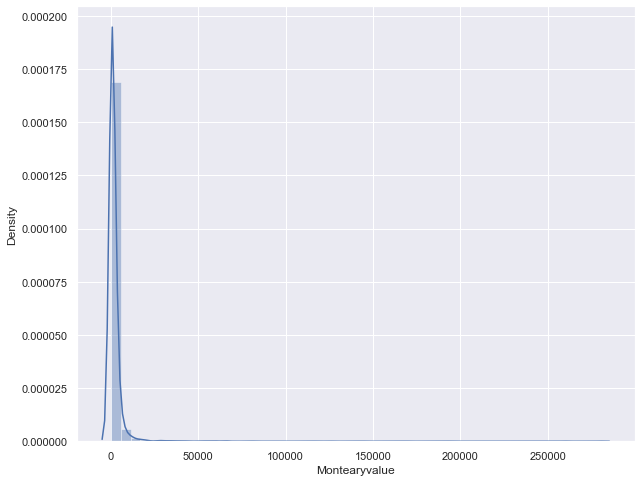

In [76]:
plot(RFM,'Montearyvalue')

In [77]:
# dealing with the outlier ::: 
# to deal with the outlier using np.log function ::: 
rfm_log = RFM[['Recency', 'Freq', 'Montearyvalue']].apply(np.log, axis = 1).round(3)

In [78]:
# data scaler :: 
scaler=StandardScaler()
scaler=StandardScaler()
scaler.fit(rfm_log)
rfm_n=scaler.transform(rfm_log)

In [79]:
# now the data is ready for the clustring 

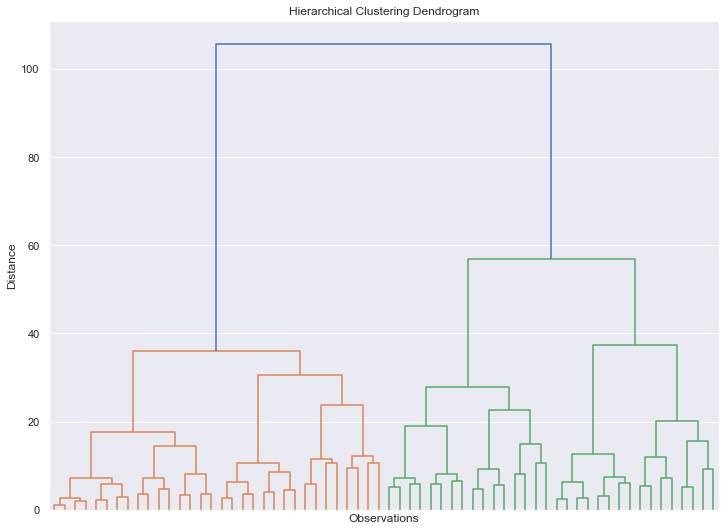

In [108]:
# hierarical clustring:: 
hier_clust = linkage(rfm_n, method = 'ward')
# plot size
plt.figure(figsize = (12,9))
# graph name 
plt.title('Hierarchical Clustering Dendrogram')
# the x_axis title 
plt.xlabel('Observations')
# the y_label title
plt.ylabel('Distance')
# dendrogram is the grapgh 
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## Agglomerative  clustring 

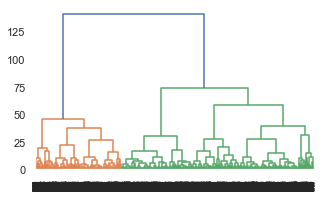

In [112]:
dendrogram = sch.dendrogram(sch.linkage(rfm_log, method='ward'))

In [114]:
# k-mean clustring :: 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 48)
    kmeans.fit(rfm_log)
    wcss.append(kmeans.inertia_)

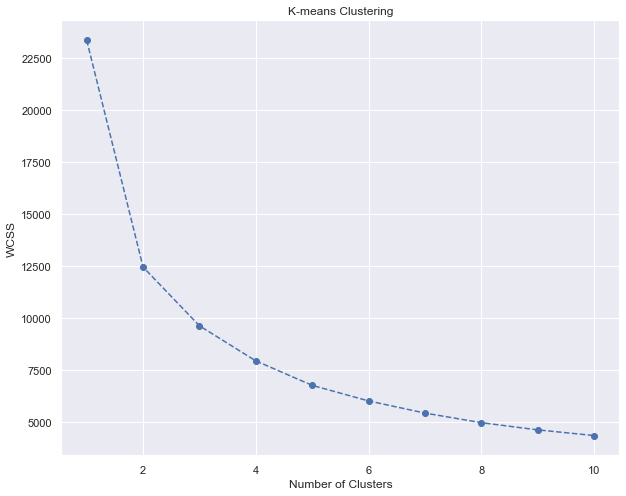

In [115]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [116]:
# Silhouette analysis
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(rfm_n)
 
print("Silhouette Coefficient: %0.3f" %silhouette_score(rfm_n, labels))
print("Calinski-Harabasz Index: %0.3f" %calinski_harabasz_score(rfm_n, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(rfm_n, labels))

Silhouette Coefficient: 0.395
Calinski-Harabasz Index: 3861.413
Davies-Bouldin Index: 0.949


In [117]:
# k =2 is the highe silhouete score >>>>>>

In [118]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(rfm_n)

KMeans(n_clusters=2, random_state=42)

In [119]:
segm_kmeans = RFM.copy()
segm_kmeans['Segment K-means'] = kmeans.labels_

In [120]:
segm_analysis = segm_kmeans.groupby(['Segment K-means']).mean()
segm_analysis

,Recency,Freq,Montearyvalue
Segment K-means,,,
0,141.681762,24.609888,469.830042
1,31.276541,172.685655,4016.741575


In [121]:
segm_kmeans['Labels'] = segm_kmeans['Segment K-means'].map({0:'at risk', 
                                                                  1:'loyal customers '})

In [122]:
segm_kmeans.head()

,Recency,Freq,Montearyvalue,Segment K-means,Labels
CustomerID,,,,,
12346,326,1,77183.60,0,at risk
12347,2,182,4310.00,1,loyal customers
12348,75,31,1797.24,0,at risk
12349,19,73,1757.55,1,loyal customers
12350,310,17,334.40,0,at risk


C:\Users\ahame\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


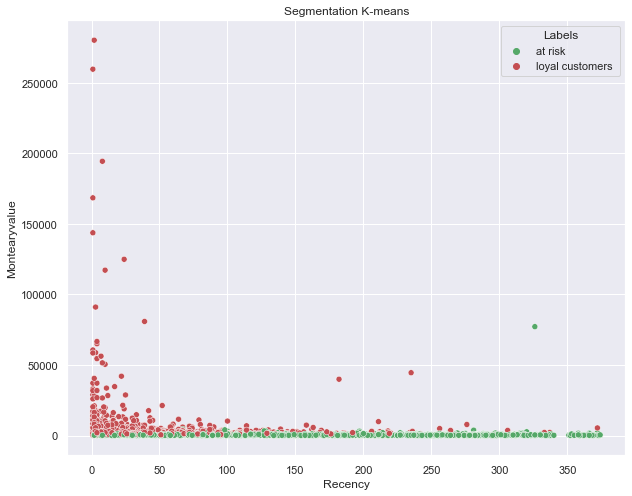

In [123]:
Labels=segm_kmeans['Labels']
x_axis = segm_kmeans['Recency']
y_axis = segm_kmeans['Montearyvalue']
plt.figure(figsize = (10, 8))

sns.scatterplot(x_axis, y_axis,hue=Labels, palette = ['g', 'r'])

plt.title('Segmentation K-means')
plt.show()

# DB SCAN

In [124]:
from sklearn.neighbors import NearestNeighbors

In [125]:
neighb = NearestNeighbors(n_neighbors=2)

In [126]:
nbrs=neighb.fit(rfm_n)

In [127]:
distances,indices=nbrs.kneighbors(rfm_n)

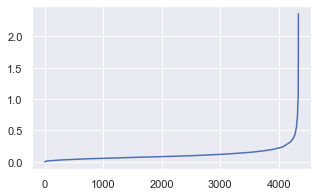

In [128]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # s

In [129]:
from sklearn.cluster import DBSCAN

In [130]:
dbscan = DBSCAN(eps = 0.3, min_samples = 8).fit(rfm_n) # fitting the model
labels = dbscan.labels_ # getting the labels


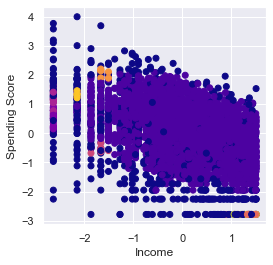

In [131]:
plt.figure(figsize=(4,4))
plt.scatter(rfm_n[:, 0], rfm_n[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing th

In [132]:
print("Silhouette Coefficient: %0.3f" %silhouette_score(rfm_n, labels))
print("Calinski-Harabasz Index: %0.3f" %calinski_harabasz_score(rfm_n, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(rfm_n, labels))

Silhouette Coefficient: -0.038
Calinski-Harabasz Index: 57.253
Davies-Bouldin Index: 1.776



## MeanShift

In [133]:
from numpy import where 
from numpy import unique
from sklearn.cluster import MeanShift
from matplotlib import pyplot

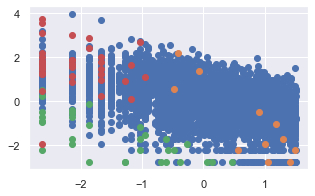

In [134]:

model = MeanShift()
yhat = model.fit_predict(rfm_n)

clusters = unique(yhat)

for cluster in clusters:

    row_ix = where(yhat == cluster)

    pyplot.scatter(rfm_n[row_ix, 0], rfm_n[row_ix, 1])

pyplot.show()

In [135]:
print("Silhouette Coefficient: %0.3f" %silhouette_score(rfm_n, yhat))
print("Calinski-Harabasz Index: %0.3f" %calinski_harabasz_score(rfm_n, yhat))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(rfm_n, yhat))

Silhouette Coefficient: 0.271
Calinski-Harabasz Index: 104.272
Davies-Bouldin Index: 1.214
